## Subplots

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from pathlib import Path

data_path = Path('../data')

%matplotlib inline

In [13]:
data = pd.read_csv(data_path / 'house.csv')
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [14]:
data['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [15]:
agrup = data.groupby('condition').agg({
    'sqft_living' : 'mean',
    'sqft_lot' : 'mean'
})
agrup

,sqft_living,sqft_lot
condition,,
1,1325.000000,19718.000000
2,1526.875000,39597.812500
3,2218.987478,14164.930783
4,1986.699681,15969.862620
5,2108.618391,14293.544828


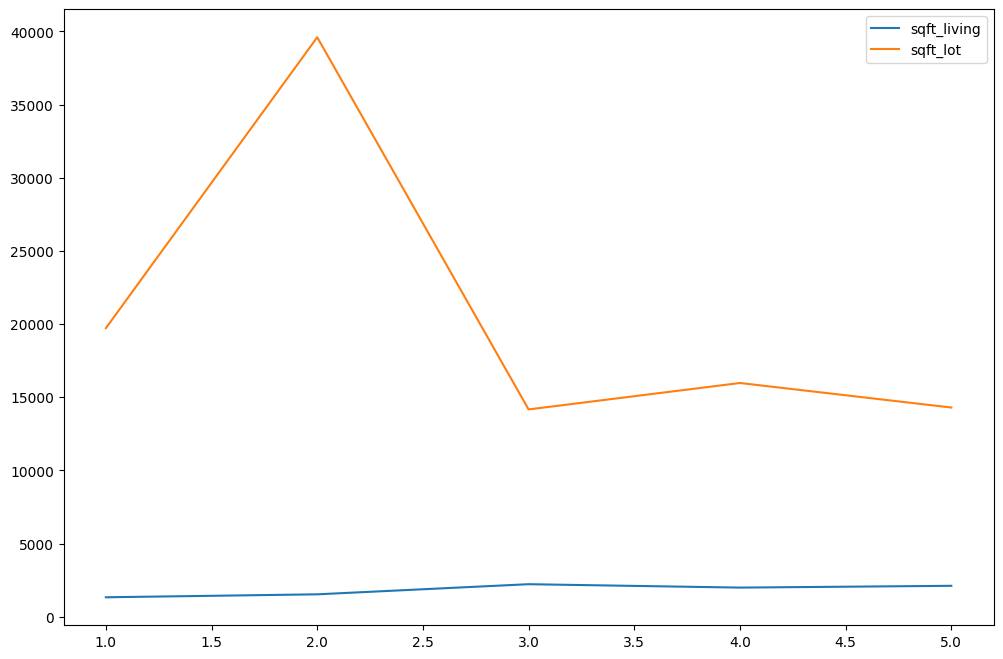

In [16]:
fig, ax = plt.subplots(figsize = (12,8))

ax.plot(agrup['sqft_living'], label = 'sqft_living')
ax.plot(agrup['sqft_lot'], label = 'sqft_lot')

ax.legend()

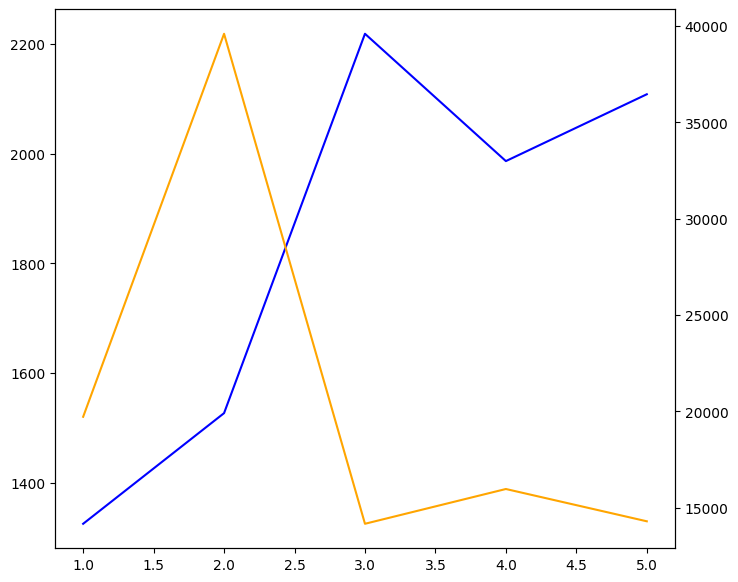

In [17]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

In [18]:
cities = data.query('city in ("Seattle", "Renton", "Bellevue", "Redmond", "Issaquah")')

agr = cities.groupby(['city', 'condition'])['price'].mean().unstack().T
agr.fillna(0, inplace = True)
agr

city,Bellevue,Issaquah,Redmond,Renton,Seattle
condition,,,,,
1,365000.000000,0.000000,550000.000000,0.000000,341000.000000
2,0.000000,0.000000,170000.000000,427000.000000,427080.000000
3,964193.383451,619677.918680,690890.027797,411158.779352,543221.769090
4,713819.653623,517070.750000,598745.377841,307572.165123,592722.333256
5,818712.464286,587137.555556,825000.000000,342921.866667,721616.962702


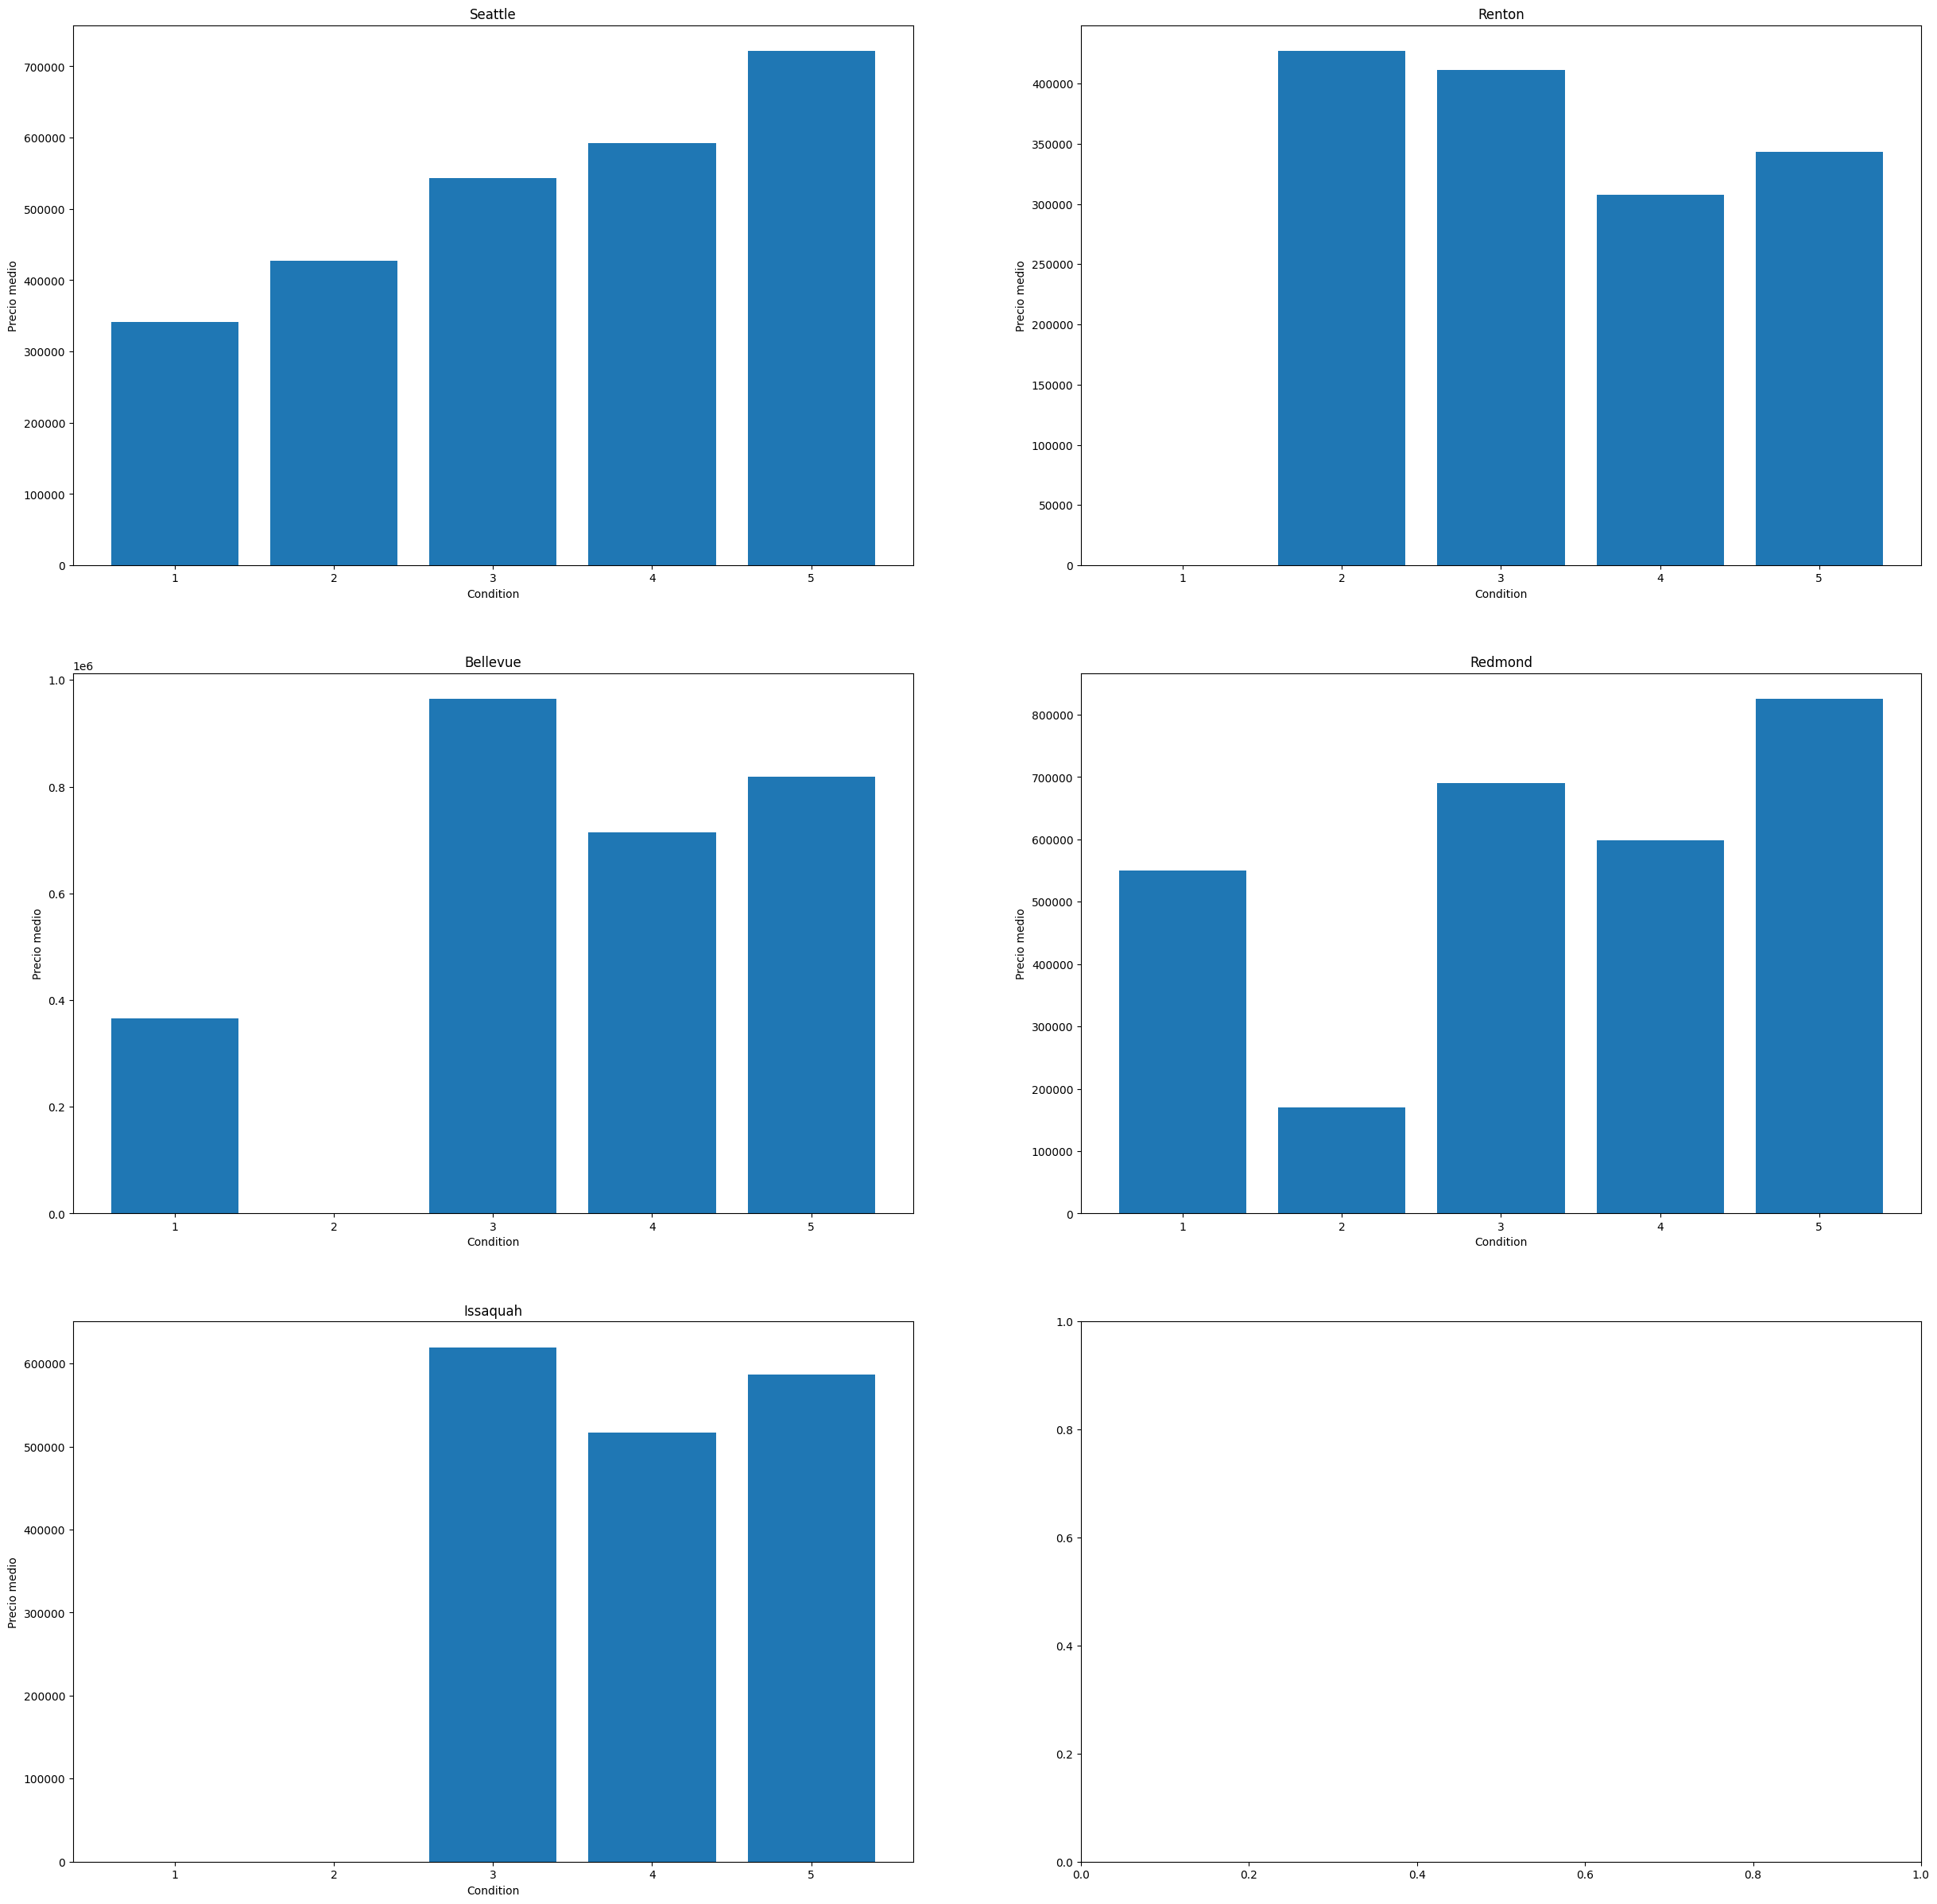

In [19]:
cities = ["Seattle", "Renton", "Bellevue", "Redmond", "Issaquah"]

fig, ax = plt.subplots(nrows=3, ncols = 2, figsize = (30,30))

i,j = 0,0

for c in cities:
    ax[i,j].bar(x = agr.index, height = agr[c].values)
    ax[i,j].set_title(c)
    ax[i,j].set_xlabel('Condition')
    ax[i,j].set_ylabel('Precio medio')
    j+=1
    if j == 2:
        i+=1
        j=0

## Leyendas

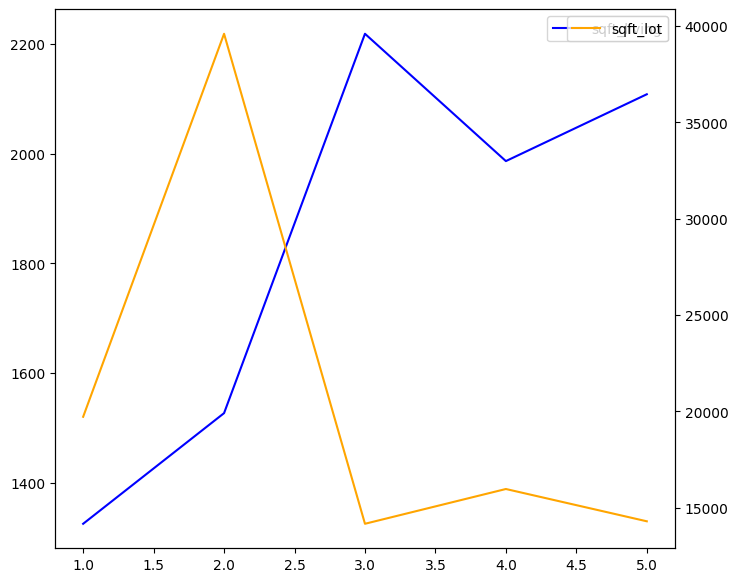

In [20]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

ax.legend()
ax1.legend()

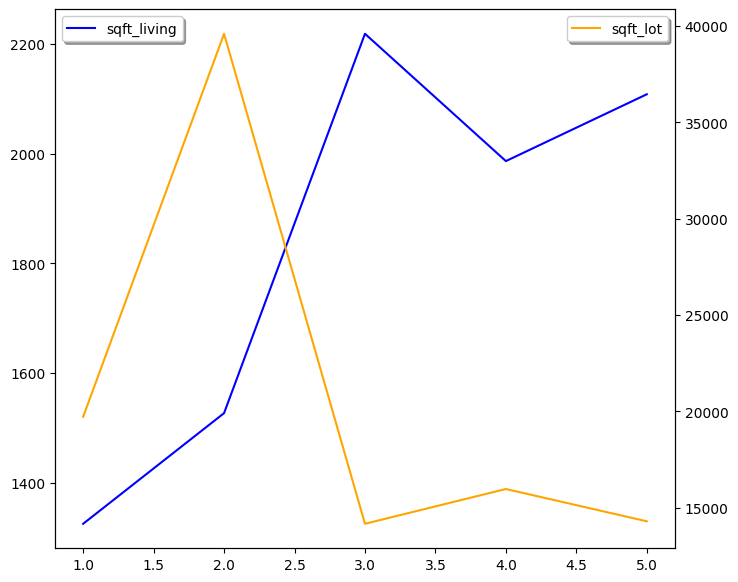

In [27]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

ax.legend(loc = 'upper left', fontsize = 10,shadow = True)
ax1.legend(loc = 'upper right', shadow = True)

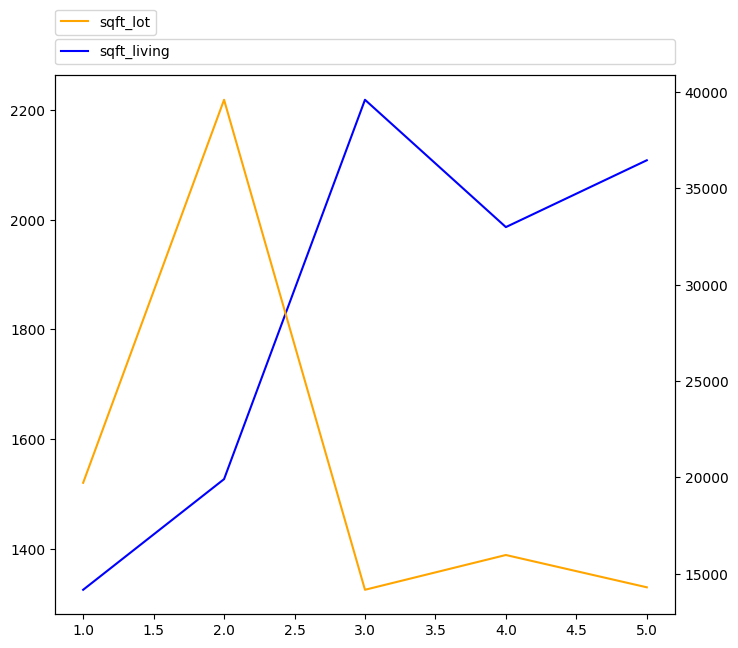

In [31]:
fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper left',
           ncol=2, mode=None, borderaxespad=0.)

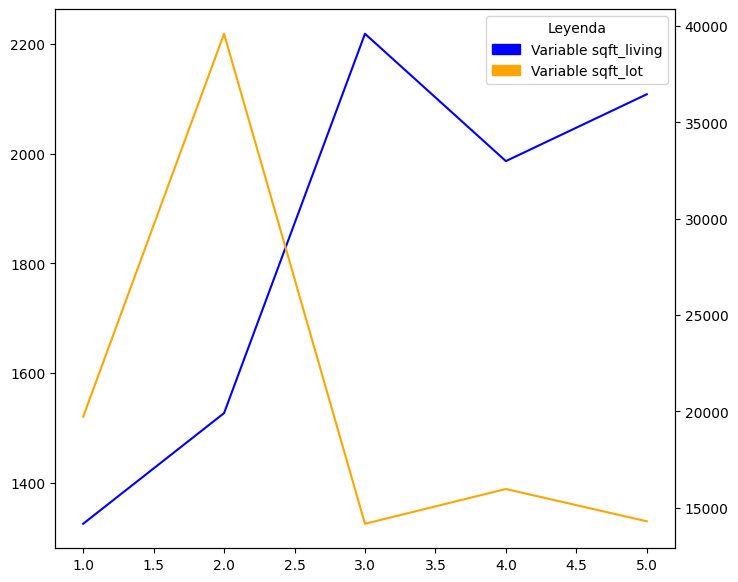

In [23]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize = (8,7))

ax.plot(agrup['sqft_living'], label = 'sqft_living', color = 'blue')

ax1 = ax.twinx()
ax1.plot(agrup['sqft_lot'], label = 'sqft_lot', color = 'orange')

sqft_living = mpatches.Patch(color='blue', label='Variable sqft_living')
sqft_lot = mpatches.Patch(color='orange', label='Variable sqft_lot')
plt.legend(handles=[sqft_living, sqft_lot], title = 'Leyenda')